Use EDA to explore, clean, and analyze 2 different datasets one on National SAT scores and the other on drug abuse.  Also use Powerpoint to visulize/present your findings to a non technical audience.

In [4]:
#Importing anything necessary
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [5]:
#Exploring/cleaning SAT dataset
sat = pd.read_csv('sat_scores.csv')
print sat

   State  Rate  Verbal  Math
0     CT    82     509   510
1     NJ    81     499   513
2     MA    79     511   515
3     NY    77     495   505
4     NH    72     520   516
5     RI    71     501   499
6     PA    71     500   499
7     VT    69     511   506
8     ME    69     506   500
9     VA    68     510   501
10    DE    67     501   499
11    MD    65     508   510
12    NC    65     493   499
13    GA    63     491   489
14    IN    60     499   501
15    SC    57     486   488
16    DC    56     482   474
17    OR    55     526   526
18    FL    54     498   499
19    WA    53     527   527
20    TX    53     493   499
21    HI    52     485   515
22    AK    51     514   510
23    CA    51     498   517
24    AZ    34     523   525
25    NV    33     509   515
26    CO    31     539   542
27    OH    26     534   439
28    MT    23     539   539
29    WV    18     527   512
30    ID    17     543   542
31    TN    13     562   553
32    NM    13     551   542
33    IL    12

In [6]:
sat.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


In [7]:
#Creating a data dictionary to clarify data for others and putting it into a dataframe
dd = [{'Variable': 'State', 'Variable Type': 'String', 'Variable Description': 'State abbreviation.'},
       {'Variable': 'Rate', 'Variable Type': 'Integer', 'Variable Description': '% of HS students who took the SAT'},
       {'Variable': 'Verbal', 'Variable Type': 'Integer', 'Variable Description': 'Avg state Verbal score'},
       {'Variable': 'Math', 'Variable Type': 'Integer', 'Variable Description': 'Avg state Math score'}
]
ddpd = pd.DataFrame(dd)
ddpd

,Variable,Variable Description,Variable Type
0,State,State abbreviation.,String
1,Rate,% of HS students who took the SAT,Integer
2,Verbal,Avg state Verbal score,Integer
3,Math,Avg state Math score,Integer


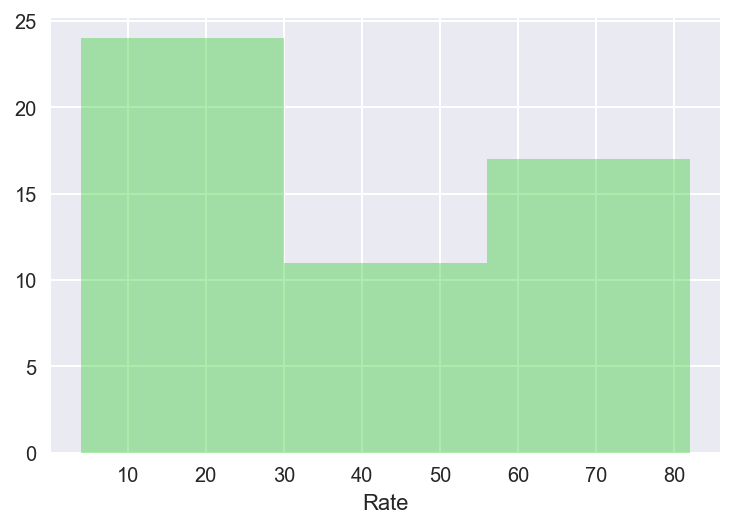

In [9]:
#Plotting data using multiple visualizations
sns.distplot(sat['Rate'], kde=False, color='limegreen')

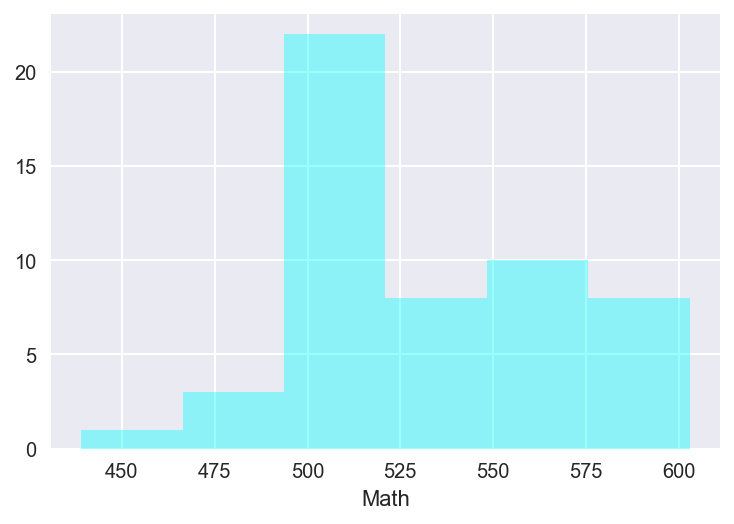

In [10]:
sns.distplot(sat['Math'], kde=False, color='cyan')

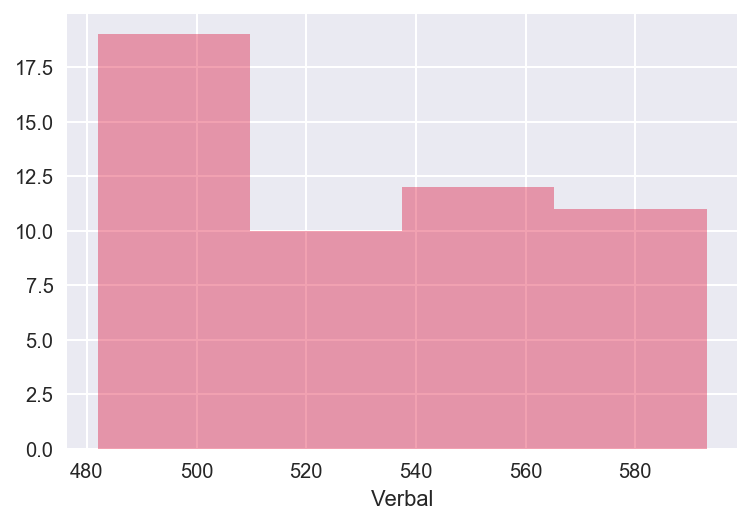

In [11]:
sns.distplot(sat['Verbal'], kde=False, color='crimson')

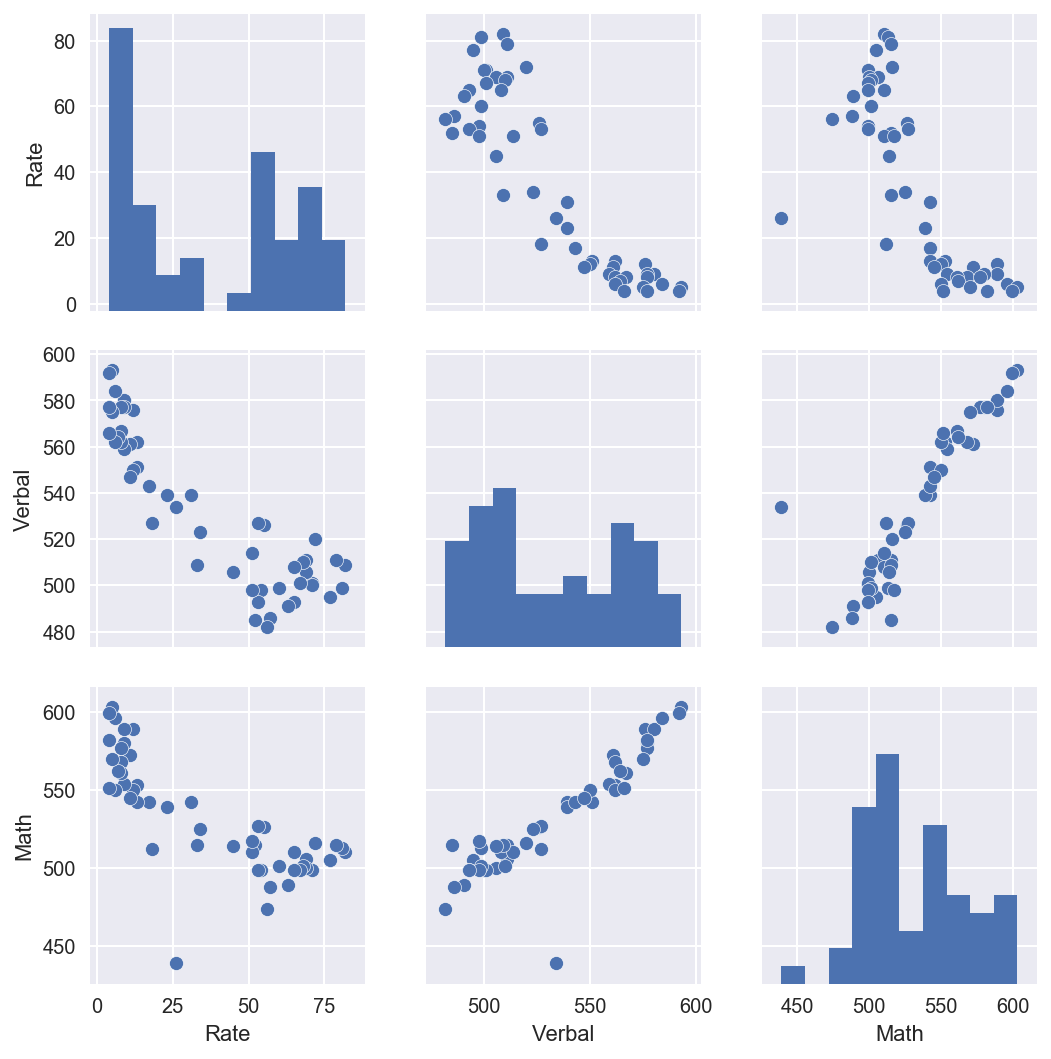

In [12]:
sns.pairplot(sat)

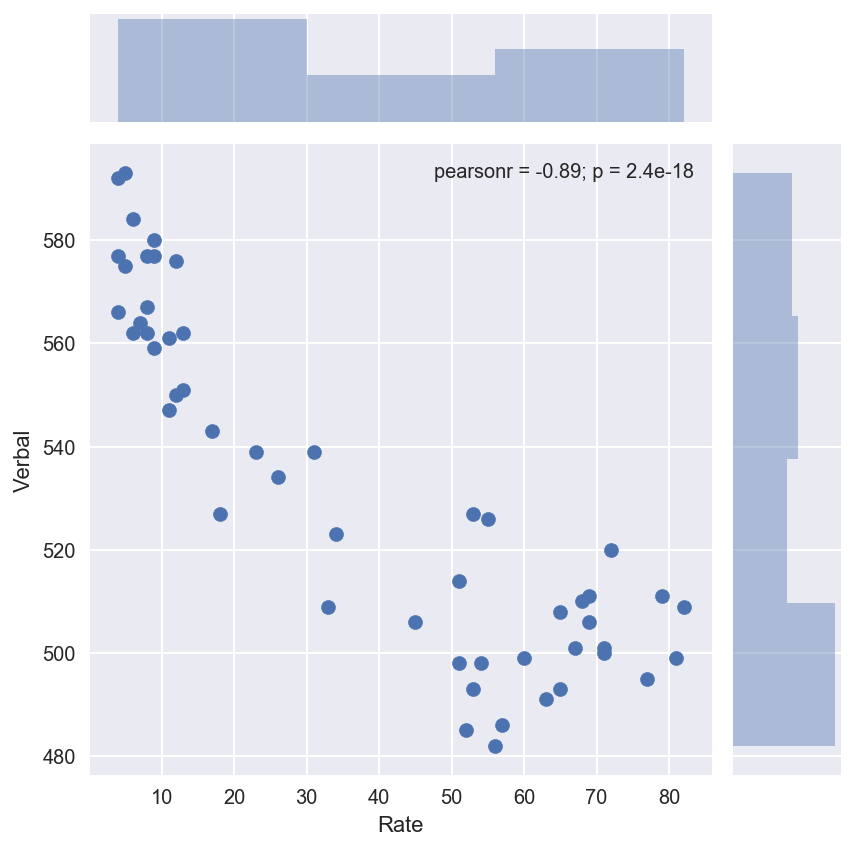

In [13]:
sns.jointplot(sat['Rate'], sat['Verbal'])

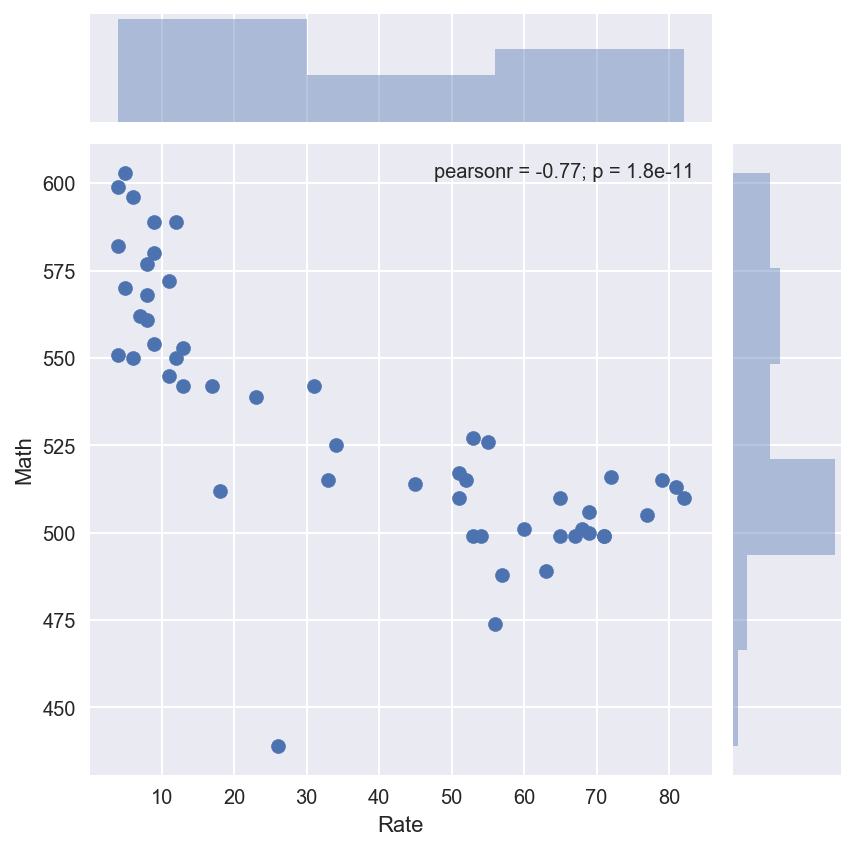

In [14]:
sns.jointplot(sat['Rate'], sat['Math'])

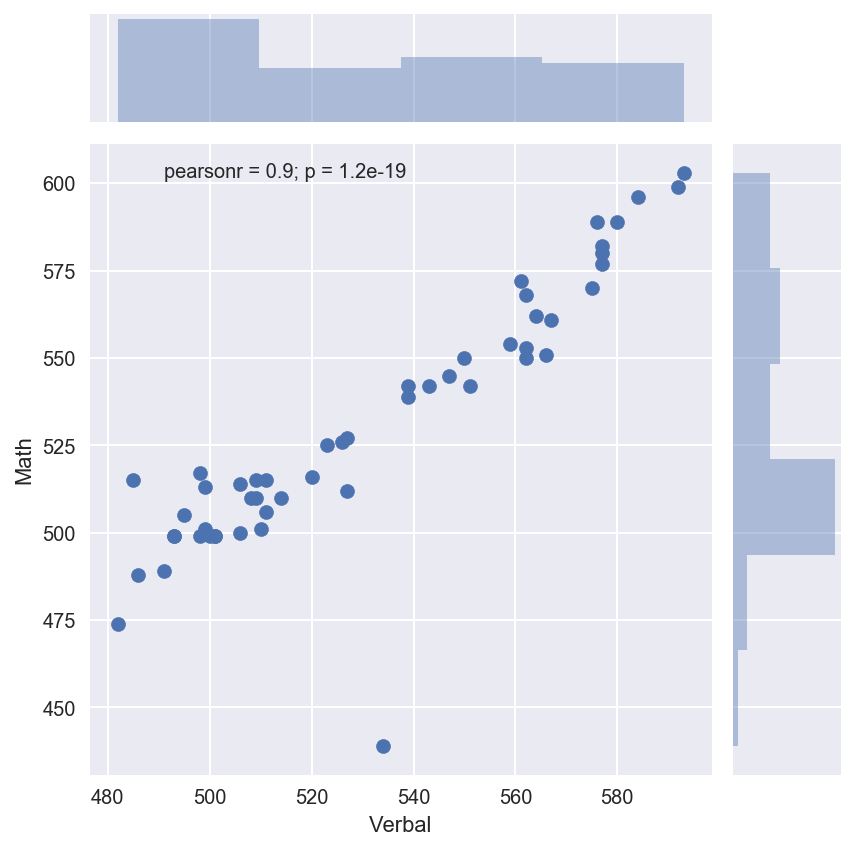

In [15]:
sns.jointplot(sat['Verbal'], sat['Math'])

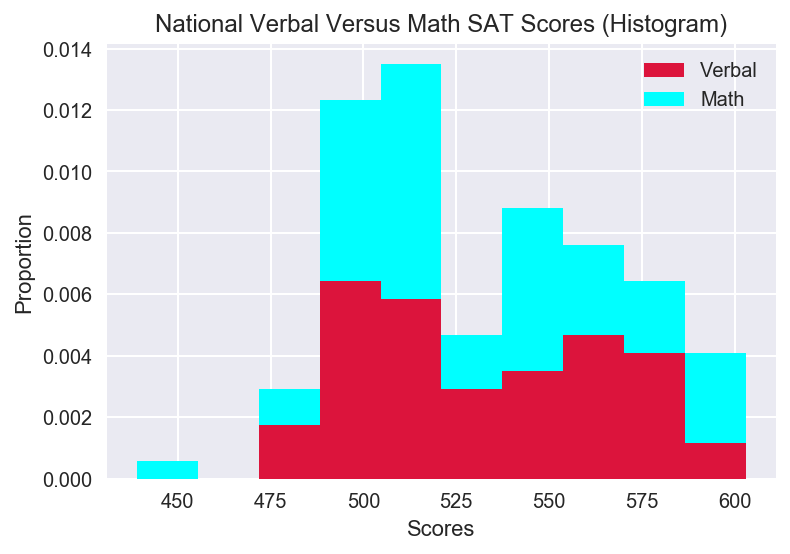

In [16]:
Verbal = sat['Verbal']
Math = sat['Math']
colors = ['crimson', 'cyan']
plt.figure()
plt.hist([Verbal, Math], stacked=True, normed=True, color=colors)
plt.title('National Verbal Versus Math SAT Scores (Histogram)')
plt.xlabel('Scores')
plt.ylabel('Proportion')
plt.legend(('Verbal', 'Math'))
plt.show()

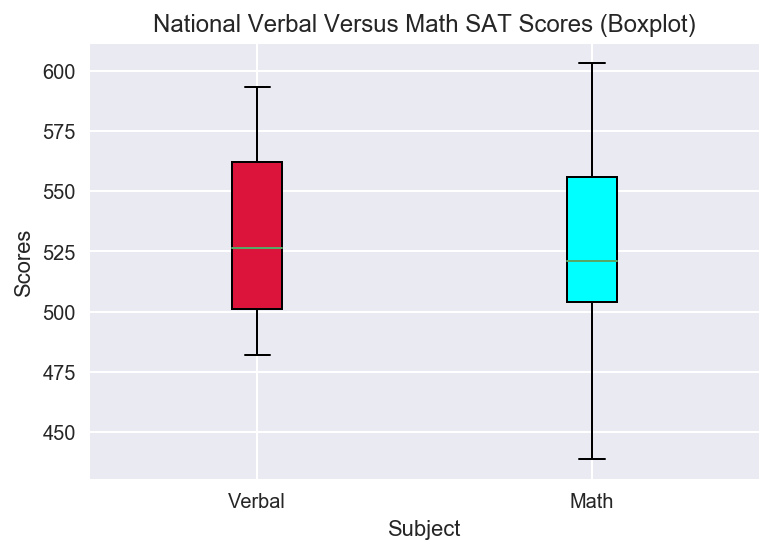

In [17]:
box = plt.boxplot([Verbal, Math], patch_artist=True)
colors = ['crimson', 'cyan']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
plt.xticks([1, 2], ['Verbal', 'Math'])
plt.xlabel('Subject')
plt.ylabel('Scores')
plt.title('National Verbal Versus Math SAT Scores (Boxplot)')
plt.show()

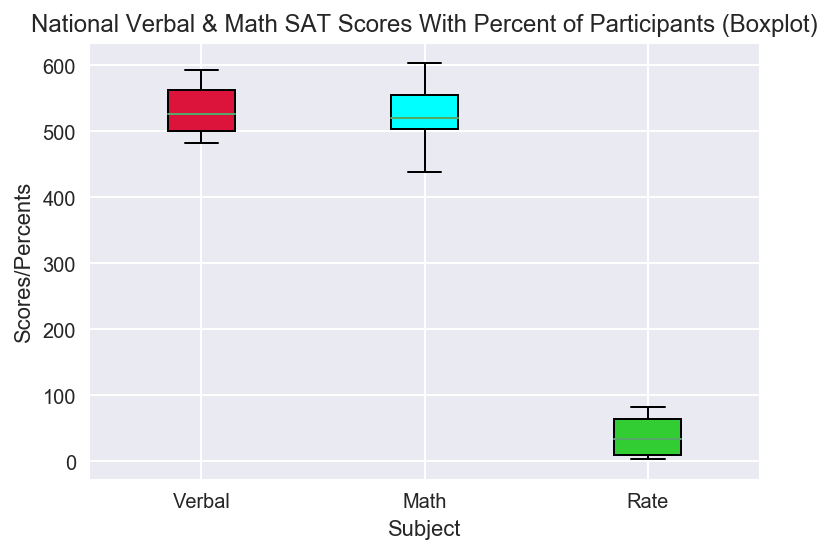

In [18]:
Rate = sat['Rate']
box = plt.boxplot([Verbal, Math, Rate], patch_artist=True)
colors = ['crimson', 'cyan', 'limegreen']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
plt.xticks([1, 2, 3], ['Verbal', 'Math', 'Rate'])
plt.xlabel('Subject')
plt.ylabel('Scores/Percents')
plt.title('National Verbal & Math SAT Scores With Percent of Participants (Boxplot)')
plt.show()

In [23]:
print sat['Verbal'].mean()
print sat['Math'].mean()

532.019230769
531.5


In [24]:
savm = sat['Verbal'] > sat['Verbal'].mean()
sat[savm]

,State,Rate,Verbal,Math
26,CO,31,539,542
27,OH,26,534,439
28,MT,23,539,539
30,ID,17,543,542
31,TN,13,562,553
32,NM,13,551,542
33,IL,12,576,589
34,KY,12,550,550
35,WY,11,547,545
36,MI,11,561,572


In [25]:
samm = sat['Math'] > sat['Math'].mean()
sat[samm]

,State,Rate,Verbal,Math
26,CO,31,539,542
28,MT,23,539,539
30,ID,17,543,542
31,TN,13,562,553
32,NM,13,551,542
33,IL,12,576,589
34,KY,12,550,550
35,WY,11,547,545
36,MI,11,561,572
37,MN,9,580,589


In [27]:
sat['Verbal'].median()

526.5

In [28]:
savmed = sat['Verbal'] > sat['Verbal'].median()
sat[savmed]

,State,Rate,Verbal,Math
19,WA,53,527,527
26,CO,31,539,542
27,OH,26,534,439
28,MT,23,539,539
29,WV,18,527,512
30,ID,17,543,542
31,TN,13,562,553
32,NM,13,551,542
33,IL,12,576,589
34,KY,12,550,550


In [29]:
sat['Difference Between Verbal and Math scores'] = sat['Verbal'] - sat['Math']
print sat.head()

  State  Rate  Verbal  Math  Difference Between Verbal and Math scores
0    CT    82     509   510                                         -1
1    NJ    81     499   513                                        -14
2    MA    79     511   515                                         -4
3    NY    77     495   505                                        -10
4    NH    72     520   516                                          4


In [33]:
#Creating 2 new DataFrames to show the difference between the 2 scores
verb_high = sat.sort_values(by='Difference Between Verbal and Math scores', ascending=False)

In [34]:
math_high = sat.sort_values(by='Difference Between Verbal and Math scores')

In [35]:
verb_high.head(3)

,State,Rate,Verbal,Math,Difference Between Verbal and Math scores
27,OH,26,534,439,95
50,MS,4,566,551,15
29,WV,18,527,512,15


In [36]:
math_high.head(3)

,State,Rate,Verbal,Math,Difference Between Verbal and Math scores
21,HI,52,485,515,-30
23,CA,51,498,517,-19
1,NJ,81,499,513,-14


In [37]:
#Create a correlation matrix and describe what it's stating
matrix = np.corrcoef([sat['Rate'], sat['Verbal'], sat['Math'], sat['Difference Between Verbal and Math scores']])
print matrix
#Rate is neg correlated with everything
#Verbal is greatly correlated with math
#Math is neg correlated with Difference column, which makes sense due to the calculation

[[ 1.         -0.88643214 -0.77374621 -0.10141223]
 [-0.88643214  1.          0.89987085  0.05260027]
 [-0.77374621  0.89987085  1.         -0.3882192 ]
 [-0.10141223  0.05260027 -0.3882192   1.        ]]


In [38]:
sat.describe()

,Rate,Verbal,Math,Difference Between Verbal and Math scores
count,52.000000,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000,0.519231
std,27.301788,33.236225,36.014975,15.729939
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,504.000000,-6.000000
50%,33.500000,526.500000,521.000000,0.000000
75%,63.500000,562.000000,555.750000,4.250000
max,82.000000,593.000000,603.000000,95.000000


In [40]:
#Exploring/cleaning Drug Abuse dataset
drugs = pd.read_csv('drug-use-by-age.csv')
drugs

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


In [41]:
drugs.replace('-', np.NaN, inplace=True)

In [42]:
drugs.columns

Index([u'age', u'n', u'alcohol-use', u'alcohol-frequency', u'marijuana-use',
       u'marijuana-frequency', u'cocaine-use', u'cocaine-frequency',
       u'crack-use', u'crack-frequency', u'heroin-use', u'heroin-frequency',
       u'hallucinogen-use', u'hallucinogen-frequency', u'inhalant-use',
       u'inhalant-frequency', u'pain-releiver-use', u'pain-releiver-frequency',
       u'oxycontin-use', u'oxycontin-frequency', u'tranquilizer-use',
       u'tranquilizer-frequency', u'stimulant-use', u'stimulant-frequency',
       u'meth-use', u'meth-frequency', u'sedative-use', u'sedative-frequency'],
      dtype='object')

In [43]:
drugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          16 non-null object
crack-use                  17 non-null float64
crack-frequency            14 non-null object
heroin-use                 17 non-null float64
heroin-frequency           16 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         16 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

In [44]:
drugs[['cocaine-frequency','crack-frequency','heroin-frequency','inhalant-frequency','oxycontin-frequency',
    'meth-frequency']] = drugs[['cocaine-frequency','crack-frequency','heroin-frequency','inhalant-frequency',
                             'oxycontin-frequency','meth-frequency']].apply(pd.to_numeric)

In [45]:
drugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          16 non-null float64
crack-use                  17 non-null float64
crack-frequency            14 non-null float64
heroin-use                 17 non-null float64
heroin-frequency           16 non-null float64
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         16 non-null float64
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycont

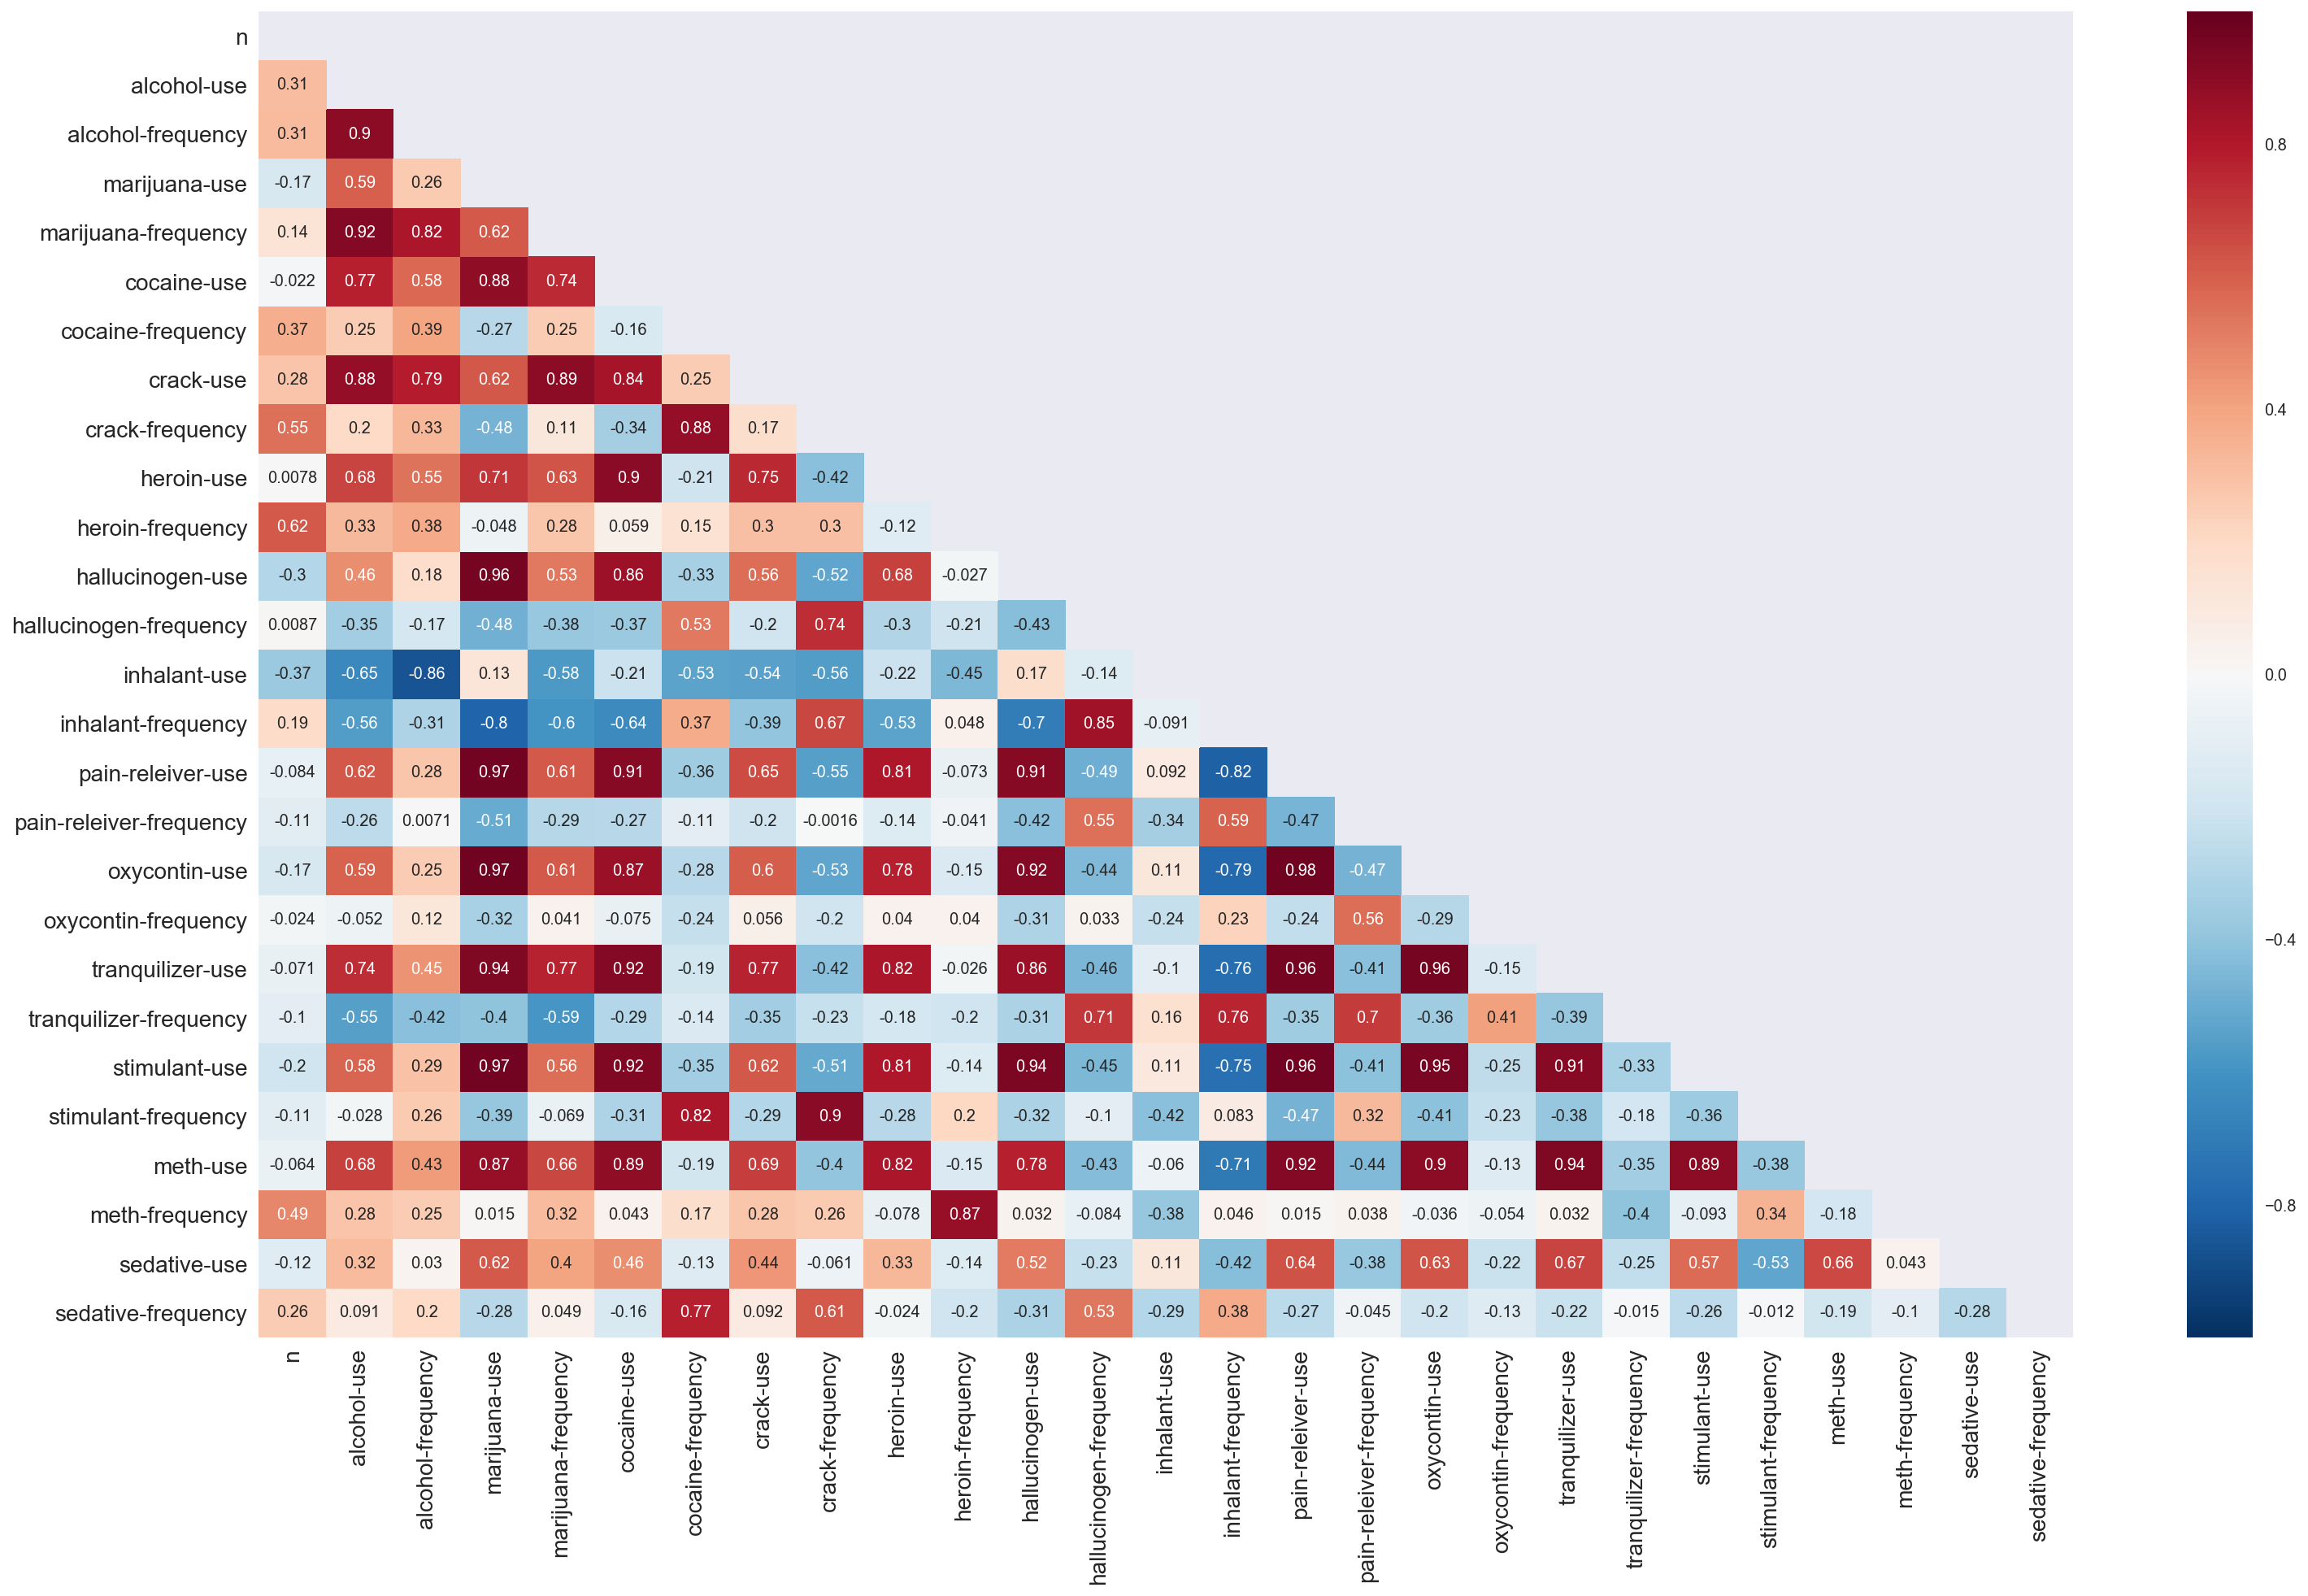

In [47]:
#What drugs gateway to others?  Which one is highly correlated with the most?  What age is the most at risk?
def correlation_heat_map(drugs):
    corrs = drugs.corr()
    fig, ax = plt.subplots(figsize=(25,15))
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    ax = sns.heatmap(corrs, mask=mask, annot=True)
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=90)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)
    plt.show()   
correlation_heat_map(drugs)

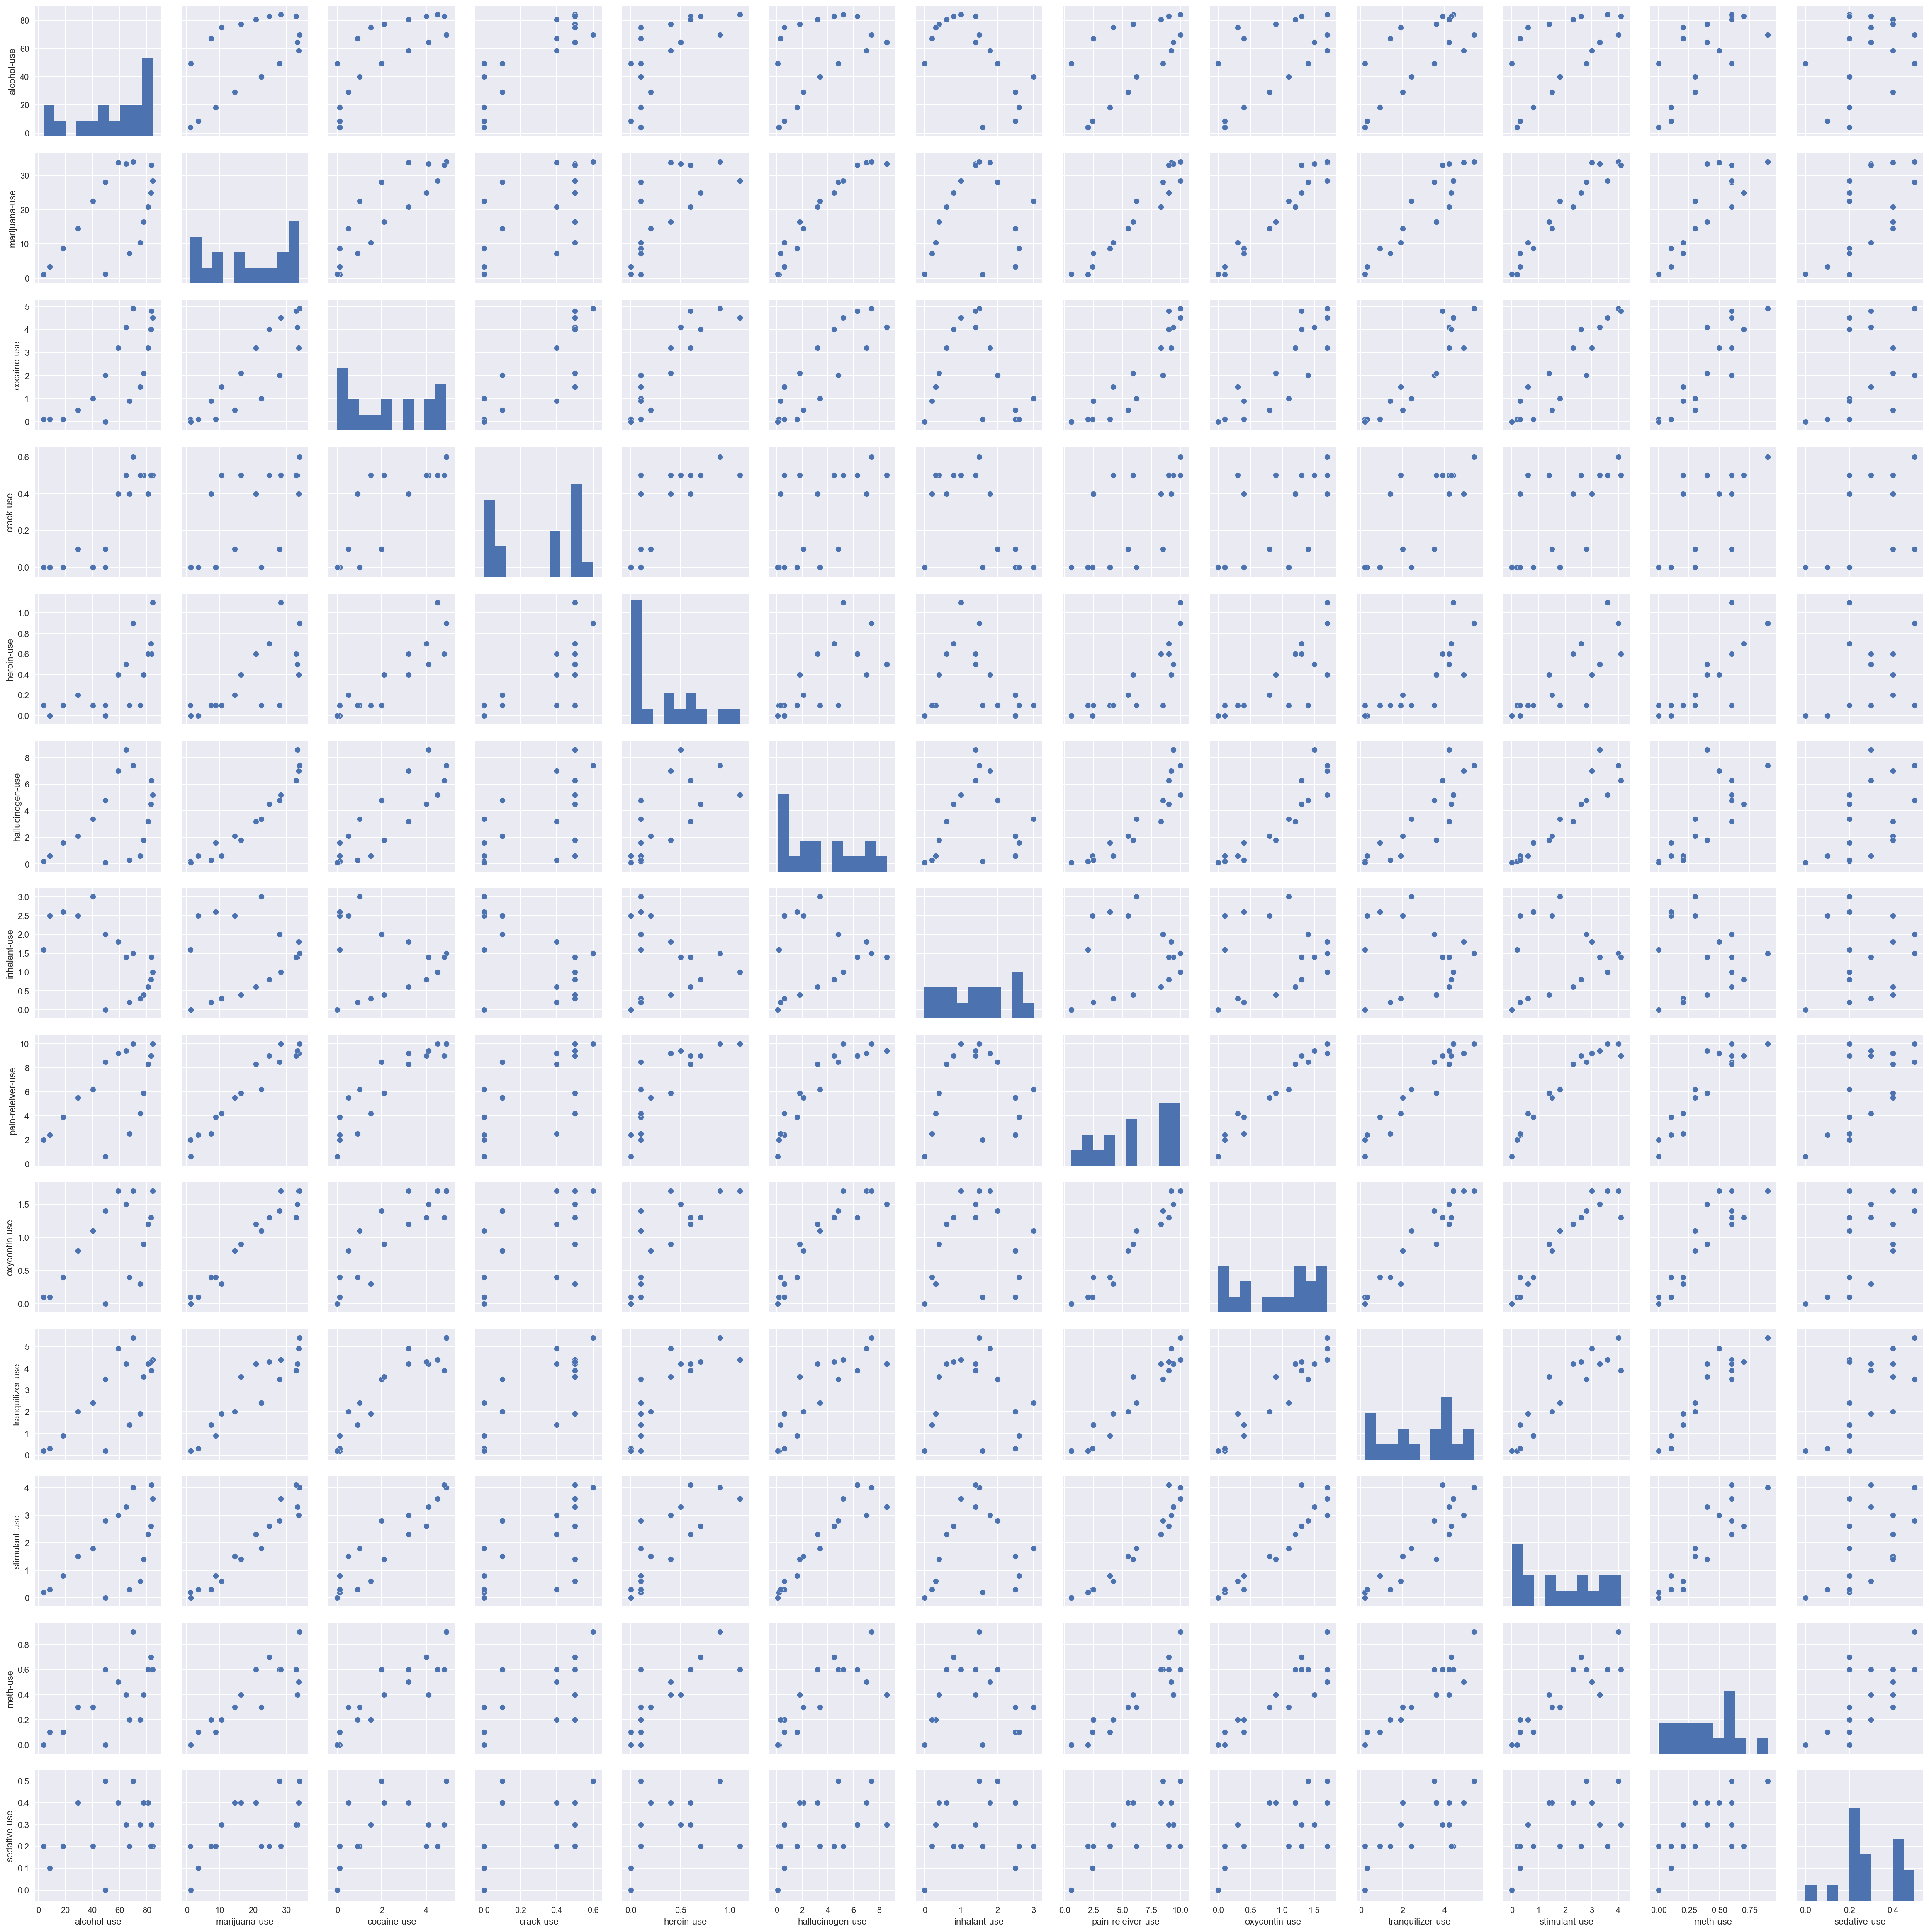

In [48]:
sns.pairplot(data=drugs[["alcohol-use","marijuana-use","cocaine-use","crack-use","heroin-use","hallucinogen-use",
                  "inhalant-use","pain-releiver-use","oxycontin-use","tranquilizer-use","stimulant-use","meth-use",
                   "sedative-use"]])

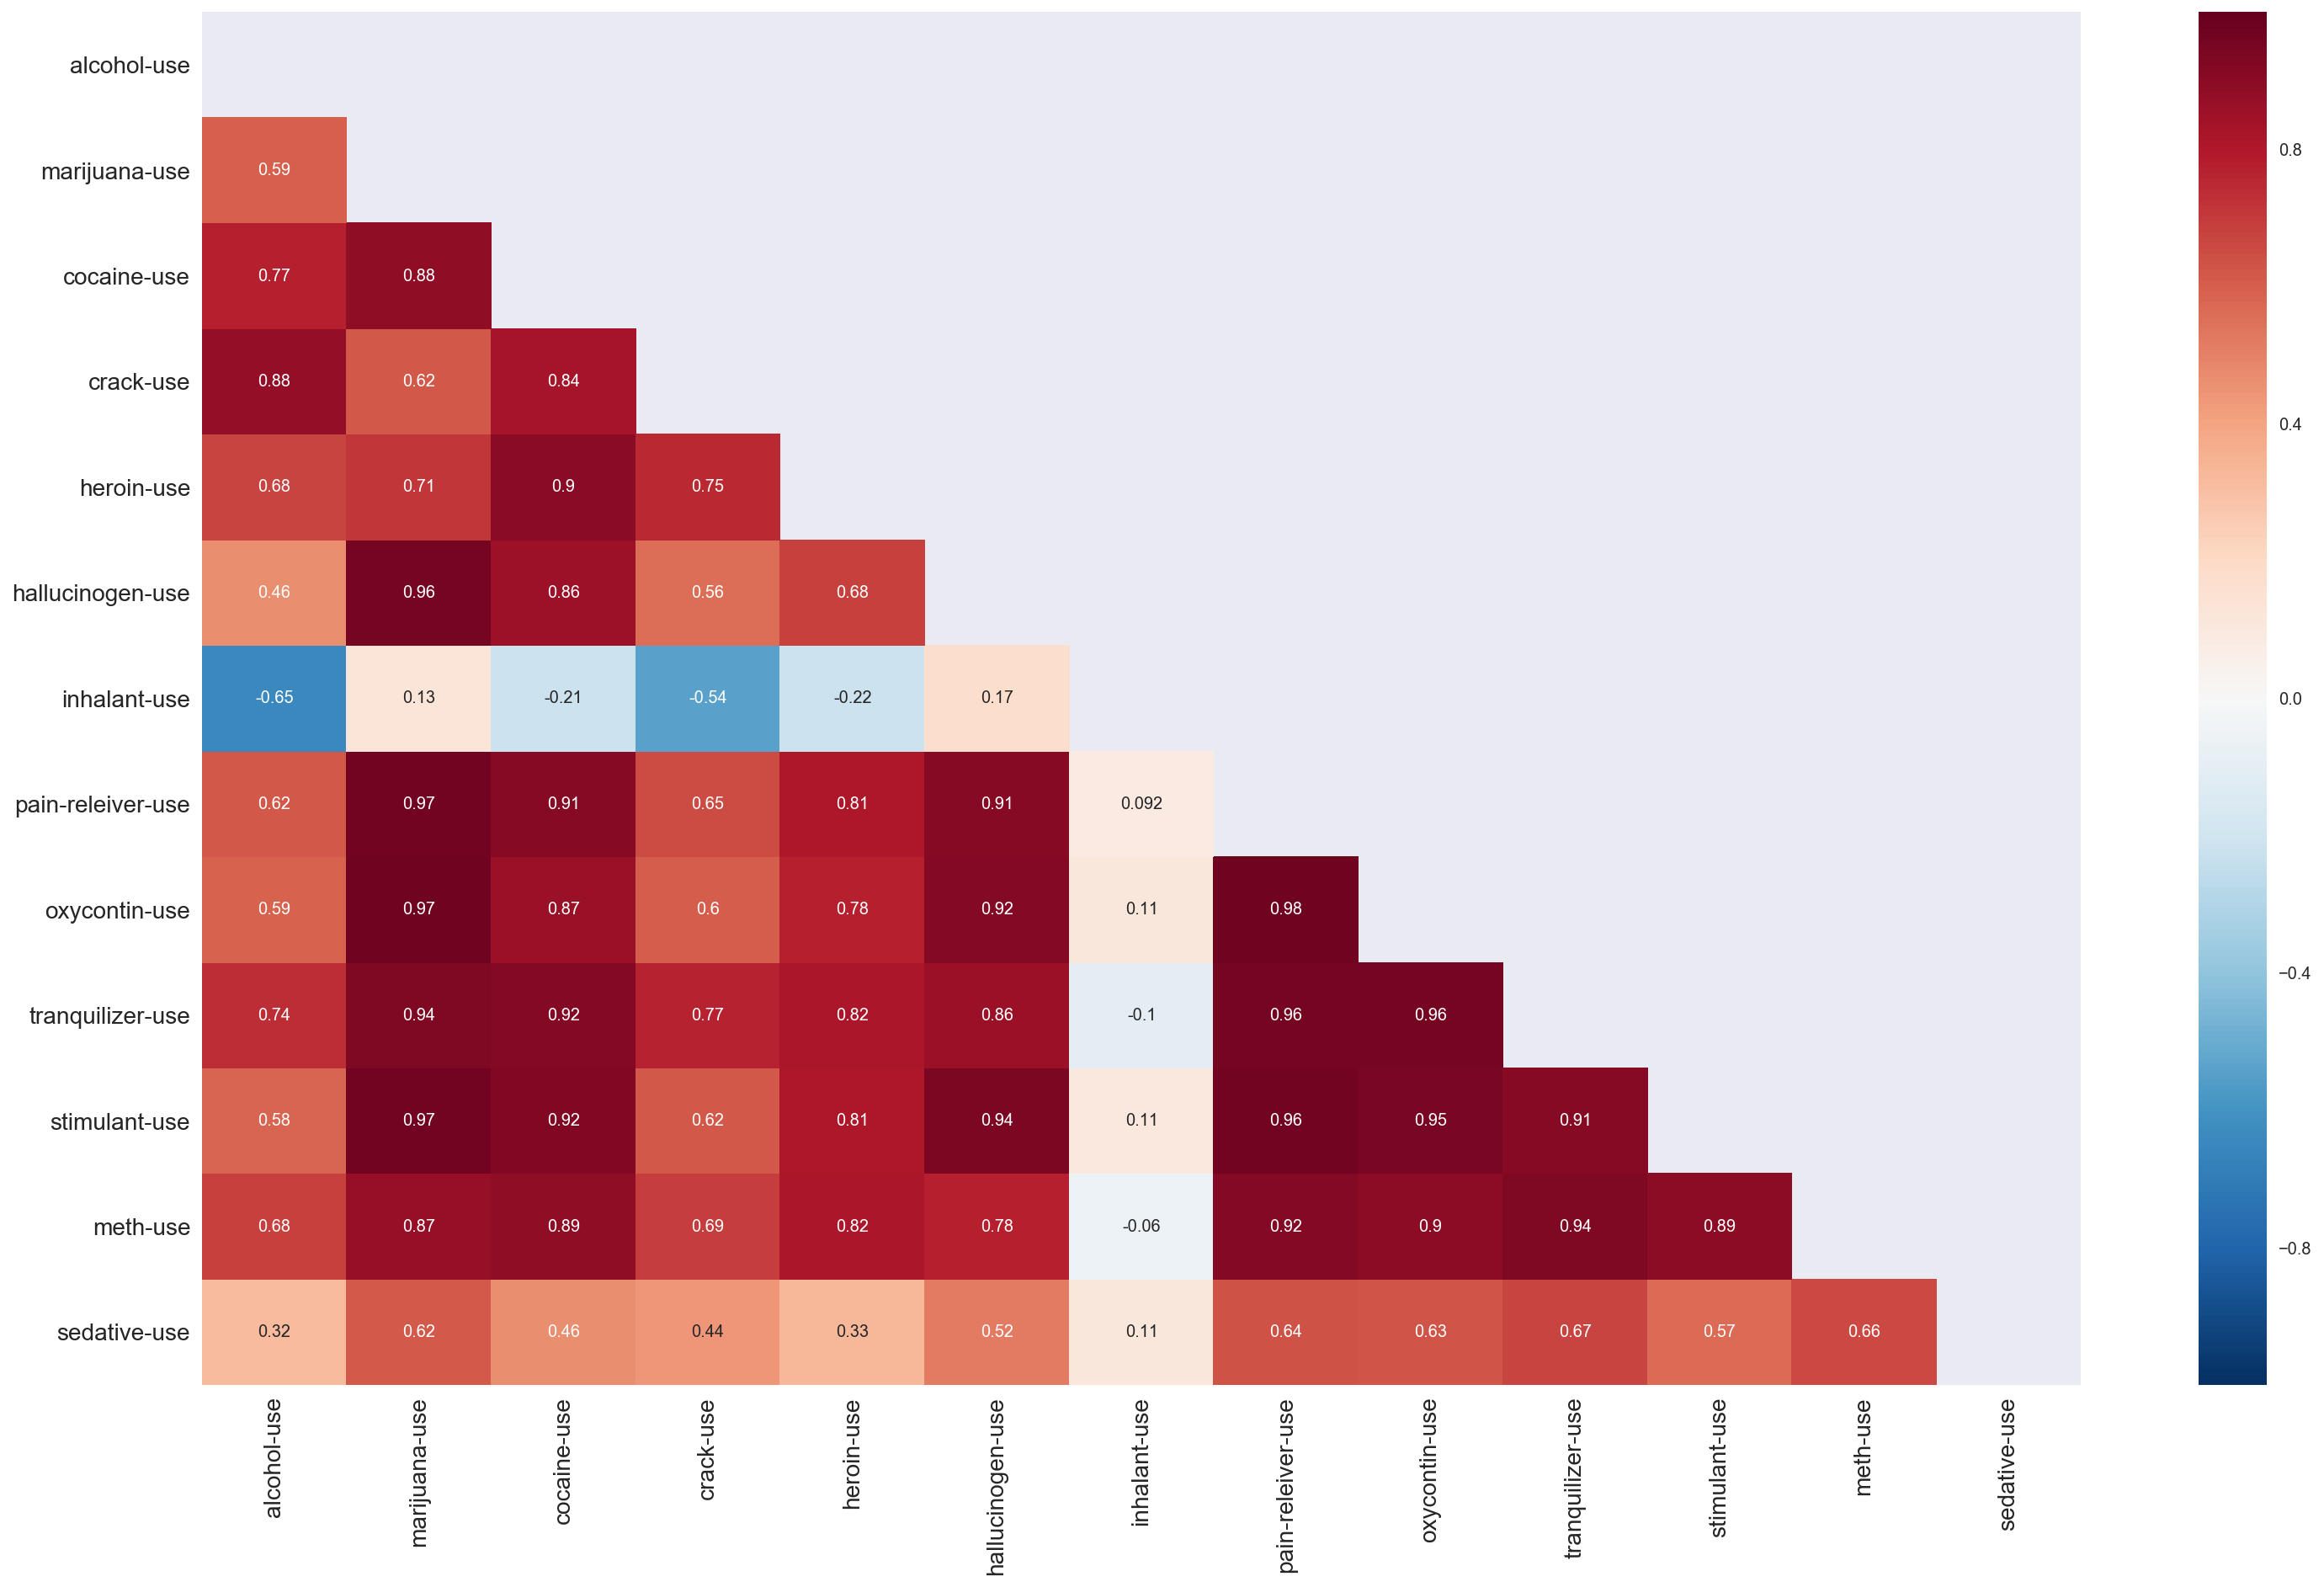

In [49]:
def correlation_heat_map(drugs):
    corrs = drugs[["alcohol-use","marijuana-use","cocaine-use","crack-use","heroin-use","hallucinogen-use",
                  "inhalant-use","pain-releiver-use","oxycontin-use","tranquilizer-use","stimulant-use","meth-use",
                   "sedative-use"]].corr()
    fig, ax = plt.subplots(figsize=(25,15))
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    ax = sns.heatmap(corrs, mask=mask, annot=True)
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=90)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)
    plt.show()
    
correlation_heat_map(drugs)

In [50]:
#Drugs with >= 0.9 correlation:
#Heroin - Cocaine
#Hallucinogen - Marijuana, Stimulant, Oxycontin, Pain-Releiver
#Pain-Releiver - Oxycontin, Marijuana, Tranquilizer, Stimulant, Meth, Cocaine, Hallucinogen
#Oxycontin - Pain-Releiver, Marijuana, Tranquilizer, Stimulant, Hallucinogen, Meth
#Tranquilizer - Oxycontin, Pain-Releiver, Marijuana, Meth, Cocaine, Stimulant
#Stimulant - Marijuana, Pain-Releiver, Oxycontin, Hallucinogen, Cocaine, Tranquilizer
#Meth - Tranquilizer, Pain-Releiver, Oxycontin

In [51]:
drugs['pain-releiver-use'].max()

10.0

In [52]:
painage = drugs['pain-releiver-use'] == 10.0
drugs[painage]

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
10,22-23,4707,84.2,52.0,28.4,52.0,4.5,5.0,0.5,5.0,...,1.7,17.5,4.4,12.0,3.6,10.0,0.6,46.0,0.2,52.0


In [53]:
#Pain-Releivers are the number one gateway drug
#The most common age of use is 20 and 22-23